In [ ]:
import glob
from itertools import product

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sourmash import signature as sig
from tqdm import tqdm

%matplotlib inline

## Info about the kmer hashes loaded

In [3]:
ksizes = 21, 27, 33, 51
ksize = ','.join(map(str, ksizes))
num_hashes = int(1e6)
dna = True
protein = True


In [4]:
output_prefix = 's3://olgabot-maca/facs/sourmash_compute_tissue_subset/'


In [5]:
! aws s3 ls $output_prefix | wc -l

1000


### Copy the files to ndnd

In [6]:
! aws s3 sync $output_prefix /home/olga/scratch/maca/facs/sourmash_compute_tissue_subset/

download: s3://olgabot-maca/facs/sourmash_compute_tissue_subset/K6-B002775-3_39_F-1-1.sig to ../../../scratch/maca/facs/sourmash_compute_tissue_subset/K6-B002775-3_39_F-1-1.sig


## Read signatures

In [40]:
range(3)

range(0, 3)

In [41]:

folder = '/home/olga/scratch/maca/facs/sourmash_compute_tissue_subset/'

filenames = glob.glob(f'{folder}/*.sig')


siglist = []

moltype = 'DNA'
ksize = 21


for filename in tqdm(filenames):
    loaded = sig.load_signatures(filename, ksize=ksize, select_moltype=moltype)
    siglist.extend(loaded)


 16%|█▌        | 161/1000 [20:00<1:58:53,  8.50s/it]


 31%|███       | 307/1000 [40:31<1:16:36,  6.63s/it]


 45%|████▌     | 453/1000 [1:00:05<1:06:34,  7.30s/it]


 60%|█████▉    | 595/1000 [1:19:24<1:22:33, 12.23s/it]


 74%|███████▍  | 740/1000 [1:38:12<30:17,  6.99s/it]


 89%|████████▊ | 886/1000 [1:55:16<07:47,  4.10s/it]


100%|██████████| 1000/1000 [2:54:59<00:00, 847.13s/it]


In [55]:
len(siglist)

1000

In [56]:
s = siglist[0]
s.name


<bound method SourmashSignature.name of SourmashSignature('A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue:NA|cell_ontology_class:bladder_urothelial_cell|free_annotation:Luminal_bladder_epithelial_cell', 2da2310b)>

In [59]:
for s in siglist[:10]:
    print('---')
    print(f's.minhash.ksize: {s.minhash.ksize}')
    print(f's.minhash.is_protein: {s.minhash.is_protein}')

---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False
---
s.minhash.ksize: 21
s.minhash.is_protein: False


/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


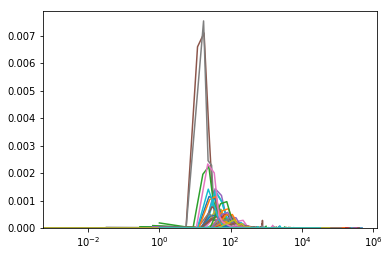

In [60]:
# siglist_k21_dna_hash_abundances = [pd.Series(s.minhash.get_mins(with_abundance=True)) for s in siglist]
# siglist_k21_dna_hash_abundances[:5]

fig, ax = plt.subplots()
ax.set(xscale='log')
 
for s in siglist:
    sns.kdeplot(pd.Series(s.minhash.get_mins(with_abundance=True)))
# ax.legend()

In [61]:
hashes = s.minhash.get_mins(with_abundance=True)

In [62]:
pd.Series(hashes).head()

5185133228099     1
10809012144400    1
11183162483320    1
11329527245923    1
18288931836992    2
dtype: int64

In [63]:
# unique_hashes = set([])

# num_hashes_per_i = pd.Series(index=range(len(siglist_k21_dna)))

# for i, s in enumerate(siglist_k21_dna):
#     unique_hashes.update(s.minhash.get_mins())
    
#     n = len(unique_hashes)
#     num_hashes_per_i[i] = n
    
# #     print(f'i: {i}\tNum hashes: {n}')


# num_hashes_per_i.plot()

In [64]:
def get_term_frequency(hash_abundance):
    """Convert raw term abundance to relative frequency in document"""
    total_counts = sum(hash_abundance.values())
    return {k: v/total_counts for k, v in hash_abundance.items()}

term_frequency = get_term_frequency(s.minhash.get_mins(with_abundance=True))

In [65]:
from collections import Counter
import math


def get_document_frequency(siglist):
    document_frequency = Counter()
    for s in siglist:
        document_frequency.update(s.minhash.get_mins())
    return document_frequency

def get_inverse_document_frequency(siglist):
    
    # total number of documents
    N = len(siglist)
    document_frequency = get_document_frequency(siglist)
    inverse_document_frequency = {k: math.log(N/v) for k, v in document_frequency.items()}
    return inverse_document_frequency
    
inverse_document_frequency = get_inverse_document_frequency(siglist)
inverse_document_frequency

{4319888920071: 6.907755278982137,
 11897683056067: 1.8140050781753747,
 15688568034930: 4.268697949366879,
 18288931836992: 0.7592869830644903,
 27514404317028: 6.214608098422191,
 28774406637780: 6.214608098422191,
 28801856705165: 2.9759296462578115,
 29695955487065: 6.907755278982137,
 31178866345647: 6.907755278982137,
 31925058964274: 2.419118909249997,
 47806340697682: 6.907755278982137,
 49151368282908: 6.907755278982137,
 52850654120648: 6.907755278982137,
 53953467848099: 6.214608098422191,
 55757903243021: 3.9633162998156966,
 60312253707825: 6.214608098422191,
 62659638291682: 6.907755278982137,
 66241835422762: 6.907755278982137,
 68153692112883: 5.521460917862246,
 73882272905754: 6.907755278982137,
 74570550004114: 6.907755278982137,
 76820010456855: 6.907755278982137,
 77444246978017: 6.907755278982137,
 79012937136486: 4.135166556742356,
 79156257812791: 6.907755278982137,
 79567150580843: 1.3547956940605195,
 87249997581706: 6.907755278982137,
 96935414578882: 6.90775

In [66]:
document_frequency = get_document_frequency(siglist)
document_frequency

Counter({4319888920071: 1,
         11897683056067: 163,
         15688568034930: 14,
         18288931836992: 468,
         27514404317028: 2,
         28774406637780: 2,
         28801856705165: 51,
         29695955487065: 1,
         31178866345647: 1,
         31925058964274: 89,
         47806340697682: 1,
         49151368282908: 1,
         52850654120648: 1,
         53953467848099: 2,
         55757903243021: 19,
         60312253707825: 2,
         62659638291682: 1,
         66241835422762: 1,
         68153692112883: 4,
         73882272905754: 1,
         74570550004114: 1,
         76820010456855: 1,
         77444246978017: 1,
         79012937136486: 16,
         79156257812791: 1,
         79567150580843: 258,
         87249997581706: 1,
         96935414578882: 1,
         101062645010737: 1,
         105471824470775: 1,
         109299403491668: 38,
         113644304926286: 1,
         118640640850110: 220,
         126361336751132: 1,
         126759430880730: 16,

In [67]:
inverse_document_frequency[550680803298069]

0.06935007813479324

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


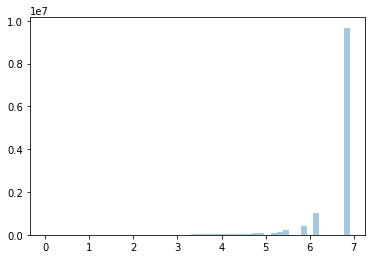

In [68]:
sns.distplot(list(inverse_document_frequency.values()), kde=False)

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/matplotlib/ticker.py:2241: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


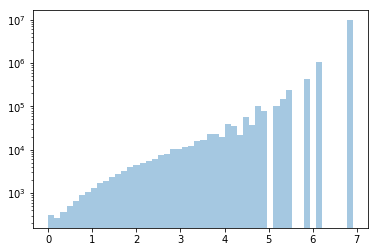

In [69]:
fig, ax = plt.subplots()
ax.set(yscale='log')

sns.distplot(list(inverse_document_frequency.values()), kde=False)


In [78]:
import pickle

In [80]:
def _get_single_cell_mean_idf(signature, idf):
    min_hashes = signature.minhash.get_mins()
    
    vsum = sum(idf[x] for x in min_hashes)
    mean_idf = vsum/len(min_hashes)
    return mean_idf


def get_mean_idf_per_cell(siglist, idf):
    idf_sums = sum(_get_single_cell_mean_idf(s, idf) for s in siglist)
    mean_idf = idf_sums/len(siglist)
    
    return mean_idf

In [81]:
mean_idf_per_cell = get_mean_idf_per_cell(siglist, inverse_document_frequency)

In [82]:
mean_idf_per_cell

4.257475889366534

In [85]:
import numpy as np

In [88]:
sum(inverse_document_frequency.values())/len(inverse_document_frequency)

6.616678327086432

## Make new signatures not containing the hashes whose IDF is less than the mean IDF

In [89]:
s0 = siglist[0]
s1 = siglist[1]

In [91]:
s0

SourmashSignature('A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue:NA|cell_ontology_class:bladder_urothelial_cell|free_annotation:Luminal_bladder_epithelial_cell', 2da2310b)

In [90]:
s1

SourmashSignature('A1-MAA000779-3_11_M-1-1|tissue:Spleen|subtissue:NA|cell_ontology_class:B_cell|free_annotation:NA', a12e8f8a)

In [93]:
s0.jaccard(s1)

0.03175723359209598

In [101]:
s0_hashes = set(s0.minhash.get_mins())
s1_hashes = set(s1.minhash.get_mins())

def jaccard(sample1, sample2):
    intersection = len(sample1.intersection(sample2))
    union = len(sample1.union(sample2))
    return intersection/union

jaccard(s0_hashes, s1_hashes)

0.03175723359209598

In [103]:
def filter_idf(hashes, idf, mean_idf_per_cell):
    return set(x for x in hashes if idf[x] > mean_idf_per_cell)

s0_hashes_idf = filter_idf(s0_hashes, inverse_document_frequency, mean_idf_per_cell)
s1_hashes_idf = filter_idf(s1_hashes, inverse_document_frequency, mean_idf_per_cell)

jaccard(s0_hashes_idf, s1_hashes_idf)

0.0002236802863107665

In [104]:
len(siglist)

1000

In [107]:
nrow = ncol = len(siglist)

values = np.zeros((nrow, ncol))
%time names = [x.name() for x in siglist]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 1.39 ms


In [108]:
names[:5]

['A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue:NA|cell_ontology_class:bladder_urothelial_cell|free_annotation:Luminal_bladder_epithelial_cell',
 'A1-MAA000779-3_11_M-1-1|tissue:Spleen|subtissue:NA|cell_ontology_class:B_cell|free_annotation:NA',
 'A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:NA|cell_ontology_class:bladder_cell|free_annotation:Bladder_mesenchymal_cell',
 'A10-B002775-3_39_F-1-1|tissue:Kidney|subtissue:NA|cell_ontology_class:endothelial_cell|free_annotation:NA',
 'A10-MAA000559-3_8_M-1-1|tissue:Spleen|subtissue:NA|cell_ontology_class:B_cell|free_annotation:NA']

## Make cell metadata

In [ ]:
annotations = pd.read_csv('~/tabula-muris/00_data_ingest/18_global_annotation_csv/annotations_facs.csv', 
                          index_col='cell')
annotations.index = annotations.index.str.replace('.', '-')
annotations['sample_id'] = annotations.index
annotations = annotations.fillna("NA")
print(annotations.shape)
annotations.head()

In [ ]:
cell_ids = [x.split('|')[0] for x in names]
print(len(cell_ids))
cell_metadata = annotations.loc[cell_ids]
print(cell_metadata.shape)
cell_metadata.head()

## Compute similarity with and without IDF

In [111]:
np.vander?

In [115]:
from joblib import Parallel, delayed
import itertools

In [119]:
def jaccard_sigs(i, j, siglist):
    return siglist[i].jaccard(siglist[j])

def jaccard_sigs_idf(i, j, siglist, idf, mean_idf_per_cell):
    i_hashes = filter_idf(siglist[i].get_mins(), inverse_document_frequency, mean_idf_per_cell)
    j_hashes = filter_idf(siglist[j].get_mins(), inverse_document_frequency, mean_idf_per_cell)
    return jacard(i_hashes, j_hashes)

In [ ]:
%%time

n_jobs = 32

values = Parallel(n_jobs=n_jobs)(delayed(jaccard_sigs)(i, j, siglist) 
                                 for i, j in itertools.product(range(nrow), range(ncol)))

/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/home/olga/miniconda3/envs/kmer-hashing/lib/python3.6/site-packages/joblib/externals/

In [ ]:
compare_vanilla = pd.DataFrame(values, index=names, columns=names)
compare_vanilla.head()

In [ ]:
%%time

values_idf = Parallel(n_jobs=n_jobs)(delayed(jaccard_sigs_idf)(i, j, siglist, inverse_document_frequency, mean_idf_per_cell) 
                                 for i, j in itertools.product(range(nrow), range(ncol)))

In [ ]:
compare_idf = pd.DataFrame(values_idf, index=names, columns=names)

In [36]:
# count_matrix = pd.DataFrame.from_records([s.minhash.get_mins(with_abundance=True) for s in siglist])
# print(count_matrix.shape)
# count_matrix.head()

MemoryError: 

In [ ]:
range(2)

In [27]:
s.minhash.get_hashes() == s.minhash.get_mins()

True

## Read annotations

In [4]:
annotations = pd.read_csv('/home/ubuntu/tabula-muris/00_data_ingest/18_global_annotation_csv/annotations_facs.csv', 
                          index_col='cell')
annotations.index = annotations.index.str.replace('.', '-')
annotations['sample_id'] = annotations.index
annotations = annotations.fillna("NA")
print(annotations.shape)
annotations.head()

NameError: name 'pd' is not defined

In [72]:
tissues = 'Bladder', 'Kidney', 'Spleen', 'Liver', 'Pancreas'

annotations_subset = annotations.query('tissue in @tissues')
print(annotations_subset.shape)
annotations_subset.head()

(5872, 24)


,Neurog3>0_raw,Neurog3>0_scaled,cell_ontology_class,cell_ontology_id,cluster.ids,free_annotation,mouse.id,mouse.sex,plate.barcode,subsetA,...,subsetC_cluster.ids,subsetD,subsetD_cluster.ids,subsetE,subsetE_cluster.ids,subtissue,tissue,tissue_tSNE_1,tissue_tSNE_2,sample_id
cell,,,,,,,,,,,,,,,,,,,,,
A1-B000610-3_56_F-1-1,NA,NA,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_56_F,F,B000610,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-7.182841,-10.895094,A1-B000610-3_56_F-1-1
A1-B002764-3_38_F-1-1,NA,NA,bladder urothelial cell,CL:1001428,3,Luminal bladder epithelial cell,3_38_F,F,B002764,NA,...,NA,NA,NA,NA,NA,NA,Bladder,4.199059,-11.050240,A1-B002764-3_38_F-1-1
A1-B002771-3_39_F-1-1,NA,NA,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_39_F,F,B002771,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-11.995435,-7.325534,A1-B002771-3_39_F-1-1
A1-D041914-3_8_M-1-1,NA,NA,bladder cell,CL:1001319,5,Bladder mesenchymal cell,3_8_M,M,D041914,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-6.820022,-14.174246,A1-D041914-3_8_M-1-1
A1-D042253-3_9_M-1-1,NA,NA,bladder cell,CL:1001319,2,Bladder mesenchymal cell,3_9_M,M,D042253,NA,...,NA,NA,NA,NA,NA,NA,Bladder,-24.163538,-7.499349,A1-D042253-3_9_M-1-1


In [73]:
annotations_subsampled = annotations_subset.groupby('tissue').apply(lambda x: x.sample(200, random_state=0))
print(annotations_subsampled.shape)
annotations_subsampled.head()

(1000, 24)


Neurog3>0_raw Neurog3>0_scaled  \
tissue  cell                                                      
Bladder L4-MAA000487-3_10_M-1-1             NA               NA   
        H18-MAA000487-3_10_M-1-1            NA               NA   
        G22-D042253-3_9_M-1-1               NA               NA   
        A14-MAA000487-3_10_M-1-1            NA               NA   
        C6-D042253-3_9_M-1-1                NA               NA   

                                      cell_ontology_class cell_ontology_id  \
tissue  cell                                                                 
Bladder L4-MAA000487-3_10_M-1-1              bladder cell       CL:1001319   
        H18-MAA000487-3_10_M-1-1  bladder urothelial cell       CL:1001428   
        G22-D042253-3_9_M-1-1     bladder urothelial cell       CL:1001428   
        A14-MAA000487-3_10_M-1-1  bladder urothelial cell       CL:1001428   
        C6-D042253-3_9_M-1-1                 bladder cell       CL:1001319   

                                  cluster.ids  \
tissue  cell                                    
Bladder L4-MAA000487-3_10_M-1-1             0   
        H18-MAA000487-3_10_M-1-1            6   
        G22-D042253-3_9_M-1-1               1   
        A14-MAA000487-3_10_M-1-1            1   
        C6-D042253-3_9_M-1-1                2   

                                                  free_annotation mouse.id  \
tissue  cell                                                                 
Bladder L4-MAA000487-3_10_M-1-1          Bladder mesenchymal cell   3_10_M   
        H18-MAA000487-3_10_M-1-1    Basal bladder epithelial cell   3_10_M   
        G22-D042253-3_9_M-1-1     Luminal bladder epithelial cell    3_9_M   
        A14-MAA000487-3_10_M-1-1  Luminal bladder epithelial cell   3_10_M   
        C6-D042253-3_9_M-1-1             Bladder mesenchymal cell    3_9_M   

                                 mouse.sex plate.barcode subsetA  \
tissue  cell                                                       
Bladder L4-MAA000487-3_10_M-1-1          M     MAA000487      NA   
        H18-MAA000487-3_10_M-1-1         M     MAA000487      NA   
        G22-D042253-3_9_M-1-1            M       D042253      NA   
        A14-MAA000487-3_10_M-1-1         M     MAA000487      NA   
        C6-D042253-3_9_M-1-1             M       D042253      NA   

                                            ...             \
tissue  cell                                ...              
Bladder L4-MAA000487-3_10_M-1-1             ...              
        H18-MAA000487-3_10_M-1-1            ...              
        G22-D042253-3_9_M-1-1               ...              
        A14-MAA000487-3_10_M-1-1            ...              
        C6-D042253-3_9_M-1-1                ...              

                                 subsetC_cluster.ids subsetD  \
tissue  cell                                                   
Bladder L4-MAA000487-3_10_M-1-1                   NA      NA   
        H18-MAA000487-3_10_M-1-1                  NA      NA   
        G22-D042253-3_9_M-1-1                     NA      NA   
        A14-MAA000487-3_10_M-1-1                  NA      NA   
        C6-D042253-3_9_M-1-1                      NA      NA   

                                 subsetD_cluster.ids subsetE  \
tissue  cell                                                   
Bladder L4-MAA000487-3_10_M-1-1                   NA      NA   
        H18-MAA000487-3_10_M-1-1                  NA      NA   
        G22-D042253-3_9_M-1-1                     NA      NA   
        A14-MAA000487-3_10_M-1-1                  NA      NA   
        C6-D042253-3_9_M-1-1                      NA      NA   

                                 subsetE_cluster.ids subtissue   tissue  \
tissue  cell                                                              
Bladder L4-MAA000487-3_10_M-1-1                   NA        NA  Bladder   
        H18-MAA000487-3_10_M-1-1                  NA        NA  Bladder   
        G22-D04

In [74]:
annotations_subsampled.groupby(['cell_ontology_class']).size()

cell_ontology_class
B cell                                    163
Kupffer cell                               14
T cell                                     44
bladder cell                              105
bladder urothelial cell                    95
endothelial cell                           64
endothelial cell of hepatic sinusoid       49
epithelial cell of proximal tubule         87
hepatocyte                                117
kidney collecting duct epithelial cell     34
leukocyte                                  12
macrophage                                 23
natural killer cell                         8
pancreatic A cell                          49
pancreatic D cell                          17
pancreatic PP cell                          6
pancreatic acinar cell                     25
pancreatic ductal cell                     15
pancreatic stellate cell                    5
type B pancreatic cell                     68
dtype: int64

In [75]:
sample_id_with_annotation = \
    annotations['sample_id'] + '|tissue:' + annotations['tissue'] \
    + '|subtissue:' + annotations['subtissue'] \
    + '|cell_ontology_class:' + annotations['cell_ontology_class'] \
    + '|free_annotation:' + annotations['free_annotation']
sample_id_with_annotation = sample_id_with_annotation.str.replace(' ', '_')
sample_id_with_annotation.name = 'sample_id_with_annotation'
sample_id_with_annotation.head()

cell
A1-B000610-3_56_F-1-1    A1-B000610-3_56_F-1-1|tissue:Bladder|subtissue...
A1-B002764-3_38_F-1-1    A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue...
A1-B002771-3_39_F-1-1    A1-B002771-3_39_F-1-1|tissue:Bladder|subtissue...
A1-D041914-3_8_M-1-1     A1-D041914-3_8_M-1-1|tissue:Bladder|subtissue:...
A1-D042253-3_9_M-1-1     A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:...
Name: sample_id_with_annotation, dtype: object

In [63]:
# ! aws s3 ls s3://olgabot-maca/facs/

In [64]:
# ! aws s3 ls s3://olgabot-maca/facs/

In [65]:
s3_prefix = 's3://czbiohub-maca/'

maca_aws = pd.read_table('s3://olgabot-maca/facs/aws_maca_remux_bytes_fastq.txt', sep='\s+', header=None, 
                         names=['date', 'time', 'filesize', 'suffix'])
maca_aws['megabytes'] = maca_aws['filesize']/1e6
maca_aws['novaseq_run'] = maca_aws['suffix'].str.extract('([AB]\d{5})')
maca_aws['novaseq_run_number'] = maca_aws['novaseq_run'].str.lstrip("AB")
maca_aws['sample_id'] = maca_aws['suffix'].str.split('/').str[-2]
maca_aws['sample_id_no_sample_number'] = maca_aws.sample_id.map(lambda x: '_'.join(x.split('_')[:3]))
maca_aws = maca_aws.join(sample_id_with_annotation, on='sample_id_no_sample_number')
maca_aws['full_s3_path'] = s3_prefix + maca_aws['suffix']
maca_aws['read'] = maca_aws['suffix'].str.extract('_(R[12])_')
print(maca_aws.shape)

maca_aws.head()

(263160, 12)


,date,time,filesize,suffix,megabytes,novaseq_run,novaseq_run_number,sample_id,sample_id_no_sample_number,sample_id_with_annotation,full_s3_path,read
0,2017-10-31,19:17:18,52570660,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,52.570660,A00111,00111,A1-D041911-3_8_M-1-1_S128,A1-D041911-3_8_M-1-1,A1-D041911-3_8_M-1-1|tissue:Tongue|subtissue:N...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R1
1,2017-10-31,19:17:18,55481347,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,55.481347,A00111,00111,A1-D041911-3_8_M-1-1_S128,A1-D041911-3_8_M-1-1,A1-D041911-3_8_M-1-1|tissue:Tongue|subtissue:N...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R2
2,2017-10-31,19:14:53,53806,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,0.053806,A00111,00111,A1-D041912-3_8_M-1-1_S1,A1-D041912-3_8_M-1-1,A1-D041912-3_8_M-1-1|tissue:Marrow|subtissue:G...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R1
3,2017-10-31,19:14:53,54967,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,0.054967,A00111,00111,A1-D041912-3_8_M-1-1_S1,A1-D041912-3_8_M-1-1,A1-D041912-3_8_M-1-1|tissue:Marrow|subtissue:G...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R2
4,2017-10-31,19:14:53,36204,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,0.036204,A00111,00111,A1-D041914-3_8_M-1-1_S269,A1-D041914-3_8_M-1-1,A1-D041914-3_8_M-1-1|tissue:Bladder|subtissue:...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R1


In [66]:
maca_aws_subsampled = maca_aws.query('sample_id_no_sample_number in @annotations_subsampled.sample_id')
print(maca_aws_subsampled.shape)
maca_aws_subsampled.head()

(4250, 12)


,date,time,filesize,suffix,megabytes,novaseq_run,novaseq_run_number,sample_id,sample_id_no_sample_number,sample_id_with_annotation,full_s3_path,read
10,2017-10-31,19:32:42,25187121,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,25.187121,A00111,00111,A1-D042253-3_9_M-1-1_S43,A1-D042253-3_9_M-1-1,A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R1
11,2017-10-31,19:32:42,26936765,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,26.936765,A00111,00111,A1-D042253-3_9_M-1-1_S43,A1-D042253-3_9_M-1-1,A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R2
56,2017-10-31,19:14:53,45884,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,0.045884,A00111,00111,A10-D041914-3_8_M-1-1_S279,A10-D041914-3_8_M-1-1,A10-D041914-3_8_M-1-1|tissue:Bladder|subtissue...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R1
57,2017-10-31,19:14:53,46591,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,0.046591,A00111,00111,A10-D041914-3_8_M-1-1_S279,A10-D041914-3_8_M-1-1,A10-D041914-3_8_M-1-1|tissue:Bladder|subtissue...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R2
72,2017-10-31,19:15:21,53760,remux_data/170907_A00111_0051_BH2HWLDMXX/rawda...,0.053760,A00111,00111,A10-MAA000559-3_8_M-1-1_S17,A10-MAA000559-3_8_M-1-1,A10-MAA000559-3_8_M-1-1|tissue:Spleen|subtissu...,s3://czbiohub-maca/remux_data/170907_A00111_00...,R1


In [100]:
samples = maca_aws_subsampled.groupby(['sample_id_no_sample_number', 'read']).apply(lambda x: '|'.join(x['full_s3_path'])).unstack()
samples = samples.join(sample_id_with_annotation)
samples = samples.rename(columns={'sample_id_with_annotation': 'name', "R1": "read1", "R2": "read2"})
print(samples.shape)
samples.head()

(1000, 3)


,read1,read2,name
sample_id_no_sample_number,,,
A1-B002764-3_38_F-1-1,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue...
A1-D042253-3_9_M-1-1,s3://czbiohub-maca/remux_data/170907_A00111_00...,s3://czbiohub-maca/remux_data/170907_A00111_00...,A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:...
A1-MAA000487-3_10_M-1-1,s3://czbiohub-maca/remux_data/170910_A00111_00...,s3://czbiohub-maca/remux_data/170910_A00111_00...,A1-MAA000487-3_10_M-1-1|tissue:Bladder|subtiss...
A1-MAA000779-3_11_M-1-1,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A1-MAA000779-3_11_M-1-1|tissue:Spleen|subtissu...
A1-MAA100039-3_11_M-1-1,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A1-MAA100039-3_11_M-1-1|tissue:Liver|subtissue...


In [101]:
! aws s3 ls s3://olgabot-maca/facs/

                           PRE merge_tabula_muris/
                           PRE sourmash/
                           PRE sourmash_compare/
                           PRE sourmash_compare_combined/
                           PRE sourmash_compare_no_track_abundance/
                           PRE sourmash_compare_no_track_abundance_combined/
                           PRE sourmash_compute_all/
                           PRE sourmash_compute_all_b_cells/
                           PRE sourmash_dna-only_trim=false_scaled=100/
                           PRE sourmash_dna-only_trim=false_scaled=1000/
                           PRE sourmash_dna-only_trim=false_scaled=1100/
                           PRE sourmash_dna-only_trim=false_scaled=1200/
                           PRE sourmash_dna-only_trim=false_scaled=1300/
                           PRE sourmash_dna-only_trim=false_scaled=1400/
                           PRE sourmash_dna-only_trim=false_scaled=1500/
                           PRE s

In [102]:
# ! aws s3 ls s3://olgabot-maca/facs/sourmash/

In [103]:

samples['output'] = output_prefix +  samples.index + '.sig'
samples.head()

,read1,read2,name,output
sample_id_no_sample_number,,,,
A1-B002764-3_38_F-1-1,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue...,s3://olgabot-maca/facs/sourmash_compute_tissue...
A1-D042253-3_9_M-1-1,s3://czbiohub-maca/remux_data/170907_A00111_00...,s3://czbiohub-maca/remux_data/170907_A00111_00...,A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:...,s3://olgabot-maca/facs/sourmash_compute_tissue...
A1-MAA000487-3_10_M-1-1,s3://czbiohub-maca/remux_data/170910_A00111_00...,s3://czbiohub-maca/remux_data/170910_A00111_00...,A1-MAA000487-3_10_M-1-1|tissue:Bladder|subtiss...,s3://olgabot-maca/facs/sourmash_compute_tissue...
A1-MAA000779-3_11_M-1-1,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A1-MAA000779-3_11_M-1-1|tissue:Spleen|subtissu...,s3://olgabot-maca/facs/sourmash_compute_tissue...
A1-MAA100039-3_11_M-1-1,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A1-MAA100039-3_11_M-1-1|tissue:Liver|subtissue...,s3://olgabot-maca/facs/sourmash_compute_tissue...


In [106]:

samples['ksize'] = ksize
samples['num_hashes'] = num_hashes
samples['dna'] = dna
samples['protein'] = protein
samples.index.name = 'id'
samples['trim_low_abundance_kmers'] = False
samples.head()

,read1,read2,name,output,ksize,num_hashes,dna,protein,trim_low_abundance_kmers
id,,,,,,,,,
A1-B002764-3_38_F-1-1,s3://czbiohub-maca/remux_data/170914_A00111_00...,s3://czbiohub-maca/remux_data/170914_A00111_00...,A1-B002764-3_38_F-1-1|tissue:Bladder|subtissue...,s3://olgabot-maca/facs/sourmash_compute_tissue...,"21,27,33,51",1000000,True,True,False
A1-D042253-3_9_M-1-1,s3://czbiohub-maca/remux_data/170907_A00111_00...,s3://czbiohub-maca/remux_data/170907_A00111_00...,A1-D042253-3_9_M-1-1|tissue:Bladder|subtissue:...,s3://olgabot-maca/facs/sourmash_compute_tissue...,"21,27,33,51",1000000,True,True,False
A1-MAA000487-3_10_M-1-1,s3://czbiohub-maca/remux_data/170910_A00111_00...,s3://czbiohub-maca/remux_data/170910_A00111_00...,A1-MAA000487-3_10_M-1-1|tissue:Bladder|subtiss...,s3://olgabot-maca/facs/sourmash_compute_tissue...,"21,27,33,51",1000000,True,True,False
A1-MAA000779-3_11_M-1-1,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A1-MAA000779-3_11_M-1-1|tissue:Spleen|subtissu...,s3://olgabot-maca/facs/sourmash_compute_tissue...,"21,27,33,51",1000000,True,True,False
A1-MAA100039-3_11_M-1-1,s3://czbiohub-maca/remux_data/170928_A00111_00...,s3://czbiohub-maca/remux_data/170928_A00111_00...,A1-MAA100039-3_11_M-1-1|tissue:Liver|subtissue...,s3://olgabot-maca/facs/sourmash_compute_tissue...,"21,27,33,51",1000000,True,True,False
